# ECE1508 NetSoft Technologies and Enablers Final Project
## Training and Testing Machine Learning Models
- **Ahmed Khan 0998325272**
- **April 15th 2019**

<u>**Table of Contents**</u>
 - <a href="#E0">1. Loading and Cleaning Data</a>
 - <a href="#E1">2. Supervised Model - Logistic Regression</a>
 - <a href="#E2">3. Unsupervised Model - K-Means Clustering</a>

## <a name="E0">1. Loading and Cleaning Data

In this section, we will load the training data collected for Voice, DNS, Telnet, and Ping data from traffic_classifier.py script. We will clean the data for usability with the Machine Learning models.

#### Install necessary libraries
First we will install the necessary libraries to run the following code.

In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn
!pip install --upgrade scikit-learn==0.23.1
!pip install --upgrade imbalanced-learn==0.7.0


In [ ]:
!python -m pip install statsmodels 

#### Importing libraries
Then we will import the libraries we need to run the following code.

In [1]:
import numpy as np

import pandas as pd
from scipy import stats
import pickle
import warnings

# Plotting libraries
import seaborn as sns
import math
import matplotlib.pyplot as plt

# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Filter warnings
warnings.filterwarnings('ignore') #filter warnings
# Show plots inline
%matplotlib inline

#### Loading Data
Here we load the CSV data collected from the Python script into pandas dataframe

In [2]:
df = pd.read_csv('/home/larry/Desktop/FlowStatistics.csv', index_col=False)
df.columns.str.split(',', expand=True)
# normal_df = pd.read_csv('/home/larry/Desktop/ML/csv/FlowStatistics(Normal).csv')
# df = pd.concat([mixed_df, normal_df], ignore_index=True)
df.head()


,Timestamp,SSIP,SSP,SDFP,SDFB,SFE,Status
0,2022-07-18_23:15:13.306651,0.4,1.6,0.5,27.0,1.6,0
1,2022-07-18_23:15:13.309375,0.4,1.6,0.5,27.0,1.6,0
2,2022-07-18_23:15:13.310084,0.4,1.6,0.5,27.0,1.6,0
3,2022-07-18_23:15:18.313410,0.4,3.6,0.5,27.0,3.6,0
4,2022-07-18_23:15:18.318547,0.4,3.6,0.5,27.0,3.6,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7558 entries, 0 to 7557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  7558 non-null   object 
 1   SSIP       7558 non-null   float64
 2   SSP        7558 non-null   float64
 3   SDFP       7558 non-null   float64
 4   SDFB       7558 non-null   float64
 5   SFE        7558 non-null   float64
 6   Status     7558 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 413.5+ KB


#### Cleaning Data
Drop any rows that contain NaN (this happens when the training script ends abruptly)

Drop the Forward Packets, Forward Bytes, Reverse Packets, Reverse Bytes data. This data increases linearly and at a certain point in time can be any value so it is not helpful as a feature in the model. 

In [4]:
df.drop('Timestamp', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7558 entries, 0 to 7557
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SSIP    7558 non-null   float64
 1   SSP     7558 non-null   float64
 2   SDFP    7558 non-null   float64
 3   SDFB    7558 non-null   float64
 4   SFE     7558 non-null   float64
 5   Status  7558 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 354.4 KB


In [5]:
# df.drop('timestamp', axis=1, inplace=True)
# df.drop('msg.datapath.id', axis=1, inplace=True)
# df.drop('flow_id', axis=1, inplace=True)
# df.drop('eth_type', axis=1, inplace=True)
# df.drop('eth_src', axis=1, inplace=True)
# df.drop('ip_src', axis=1, inplace=True)
# df.drop('l4_src', axis=1, inplace=True)
# df.drop('ip_dst', axis=1, inplace=True)
# df.drop('l4_dst', axis=1, inplace=True)
# df.drop('ip_proto', axis=1, inplace=True)
# df.drop('packet_count_per_nsecond', axis=1, inplace=True)
# df.drop('byte_count_per_second', axis=1, inplace=True)
# df.drop('icmp_type', axis=1, inplace=True)
# df.drop('icmp_code', axis=1, inplace=True)
# df.drop('duration_sec', axis=1, inplace=True)

#### Describing Data

Now we have 5242 rows and 13 columns (12 features, 1 target)

## <a name="E1"> 2. Supervised Model - Logistic Regression 

Now we will train a logistic regression model on this dataset by splitting it into a training and testing set. 

#### Split dataset
First we will split the dataset into features and targets.

In [6]:
X = df.drop('Status',axis=1)
df['Status'] = df['Status'].astype('category')
y = df["Status"]
df.describe()



,SSIP,SSP,SDFP,SDFB,SFE
count,7558.000000,7558.000000,7558.000000,7558.000000,7558.000000
mean,46.431437,49.321646,3.254849,580.195059,49.381635
std,47.525925,44.749889,30.030160,5186.131154,44.690282
min,0.200000,0.400000,0.000000,0.000000,0.400000
25%,0.400000,6.200000,0.064348,10.731554,6.400000
50%,0.600000,8.200000,0.500000,27.000000,8.400000
75%,96.200000,96.200000,2.151145,407.290363,96.200000
max,96.200000,96.200000,1563.216064,271999.595107,96.200000


In [7]:

print(y)

0       0
1       0
2       0
3       0
4       0
       ..
7553    1
7554    1
7555    1
7556    1
7557    1
Name: Status, Length: 7558, dtype: category
Categories (2, int64): [0, 1]


In [8]:
df["Status"].value_counts()


0    3867
1    3691
Name: Status, dtype: int64

The challenge of working with imbalanced datasets is that most machine learning 
techniques will ignore, and in turn have poor performance on, the minority class, 
although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. 
The simplest approach involves duplicating examples in the minority class, 
although these examples don’t add any new information to the model. 
#### Instead, new examples can be synthesized from the existing examples.

### SMOTE (Synthetic Minority Oversampling Technique) 

If enabled this will cause our sample size to decrease during PCA Border Line graph so only run to create a more accurate model. If you want to see a visual display of data use it without SMOTE.

In [9]:
# # Oversample and plot imbalanced dataset with SMOTE
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE
# from matplotlib import pyplot
# from numpy import where

# os = SMOTE(random_state=0)

# # transform the dataset
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)

#### Create training and testing sets
We will use train_test_split with test size of 0.3 to put 70% of our data into training, and 30% into testing. The random_state is set so the results are repeatable.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=101)

### RECURSIVE FEATURE ELIMINATION

In [14]:
# This will take some time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# create pipeline
# chosen algorithm specified via the “estimator”|
rfe = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=3)
# fit the model
rfe.fit(X_train,y_train)
for i in range(X.shape[1]):
    print('Column: %s, Selected %s, Rank: %.3f' % (X_train.columns[i], rfe.support_[i],rfe.ranking_[i]))
print("The optimal number of features:", rfe.n_features_)
print("Best features:", X_train.columns[rfe.support_])




Column: SSIP, Selected True, Rank: 1.000
Column: SSP, Selected True, Rank: 1.000
Column: SDFP, Selected False, Rank: 2.000
Column: SDFB, Selected False, Rank: 3.000
Column: SFE, Selected True, Rank: 1.000
The optimal number of features: 3
Best features: Index(['SSIP', 'SSP', 'SFE'], dtype='object')


#### Train model
Now we will create and train the model.

In [13]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')
# fit the model with data
logreg.fit(X_train,y_train)
predictions = logreg.predict(X_test)


#### Make predictions
Single prediction

In [14]:
idx = 111 #random number
single_x_test = [df.iloc[idx].drop('Status').tolist()]
single_y_test = df.iloc[idx]['Status']

In [15]:
single_prediction = logreg.predict(single_x_test)
print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_test))

For this sample, our model predicted 0 and it was actually 0.0


We can create a dataframe to see these in table form:

In [16]:
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()

,true,predicted
6637,1,1
4232,1,1
6144,1,1
634,0,0
6021,1,1


We see the model has a <b>99.68%</b> accuracy

In [17]:
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 99.97%


We can save the model using the pickle library to use later in real-time

In [18]:
print(pickle.format_version)

4.0


In [19]:
from platform import python_version
print(python_version())

3.8.10


In [20]:
pickle.dump(logreg,open('/home/larry/Desktop/TORONTO/trafficclassifier/LogisticRegression','wb'))

#### Confusion Matrix
The confusion matrix allows you to see the numerical breakdown of the predictions by class:

In [21]:
cm = confusion_matrix(predictions,y_test, labels=y.cat.categories)
print(cm)

[[1959    1]
 [   0 1819]]


To attach labels, we can view it as a dataframe:

In [22]:
cmDF = pd.DataFrame()

for i, row in enumerate(y.cat.categories):
    temp = {}
    for j, col in enumerate(y.cat.categories): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cmDF)

      0     1
0  1959     1
1     0  1819


We can also add a heatmap to better visualize it

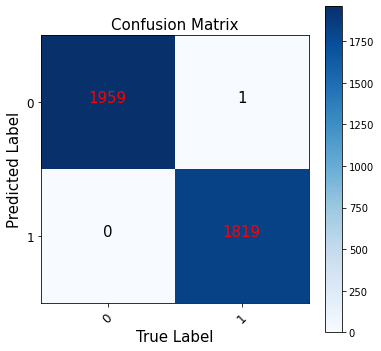

In [23]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'red'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)


Precision: Precision is about being precise, 
i.e., how accurate your model is. 
In other words, you can say, when a model makes a prediction, 
how often it is correct. In your prediction case, when your Logistic Regression model predicted patients 
are going to suffer from diabetes, that patients have 76% of the time.



In [24]:
# import the metrics class
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.9997353797300873
Precision: 1.0
Recall: 0.9994505494505495


### Receiver Operating Characteristic(ROC) 
Receiver Operating curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
#### The true-positive rate is also known as sensitivity, recall or probability of detection.
#### The false-positive rate is also known as probability of false alarm.
"AUC" ("area under curve")
is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one. 
#### In other words, when given one randomly selected positive instance and one randomly selected negative instance, AUC is the probability that the classifier will be able to tell which one is which. We want this number as close to 1 as possible. 


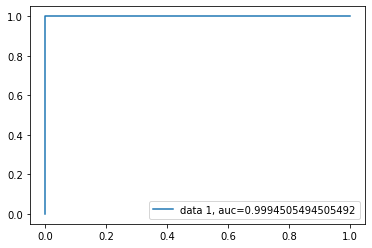

In [25]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

We can see the model works well for all classes.

#### Principal Component Analysis

Principal Component Analysis (PCA) is a dimension reduction technique. It decomposes your data into principal components where each principal component tries to explain as much variance left as possible in the data, in decending order. E.g., PC1 will explain as much variance as possible, PC2 will try to explain as much of the variance left as possible after the PC1 rotation is applied and so on. Each principal component is a combination of your existing components.

This will allow us to visualize this higher dimensional data in a lower dimensional space.

#### Normalize data
Here we will scale the data so that they are within the same range. For PCA to work correctly and find the right covariance amongst all the features we need to scale the data so that they are within the same range. This will keep one feature from contributing more to the final components.

The StandardScaler class from sklearn will remove the mean and scale the data so the have unit variance.

In [26]:
df.drop('Status',axis=1).values[0:5]

array([[ 0.4,  1.6,  0.5, 27. ,  1.6],
       [ 0.4,  1.6,  0.5, 27. ,  1.6],
       [ 0.4,  1.6,  0.5, 27. ,  1.6],
       [ 0.4,  3.6,  0.5, 27. ,  3.6],
       [ 0.4,  3.6,  0.5, 27. ,  3.6]])

Here are the means/std per feature.

In [27]:
df.drop('Status',axis=1).values.mean(axis=0)

array([ 46.43143689,  49.32164594,   3.25484949, 580.19505891,
        49.38163535])

In [28]:
df.drop('Status',axis=1).values.std(axis=0)

array([  47.52278128,   44.74692868,   30.02817366, 5185.78805379,
         44.68732537])

Here, we fit the scaler.

In [29]:
scaler = StandardScaler()
scaler.fit(df.drop('Status',axis=1))

StandardScaler()

In [30]:
scaled_data = scaler.transform(df.drop('Status',axis=1))
scaled_data[0:5]

array([[-0.96861833, -1.06647869, -0.09174216, -0.10667522, -1.06924357],
       [-0.96861833, -1.06647869, -0.09174216, -0.10667522, -1.06924357],
       [-0.96861833, -1.06647869, -0.09174216, -0.10667522, -1.06924357],
       [-0.96861833, -1.02178289, -0.09174216, -0.10667522, -1.02448815],
       [-0.96861833, -1.02178289, -0.09174216, -0.10667522, -1.02448815]])

Here are the new means and standard deviation per feature.

In [31]:
scaled_data.mean(axis=0)

array([-1.20335367e-16, -2.40670733e-16,  2.72634815e-17,  9.40120053e-19,
       -1.20335367e-16])

In [32]:
scaled_data.std(axis=0)

array([1., 1., 1., 1., 1.])

Now we will fit PCA model to the data. We will specify n_components=2, because we only want the first 2 principal components.

In [33]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [34]:
scaled_data.shape

(7558, 5)

In [35]:
x_pca = pca.transform(scaled_data)

In [36]:
x_pca.shape

(7558, 2)

#### Explained Variance

In [37]:
pca.explained_variance_ratio_

array([0.60040491, 0.39938545])

In [38]:
pca.explained_variance_ratio_.sum()*100

99.97903588545655

From above you can see that our first 2 principal components explain 84.16% of the variance in our data. We can get higher variance explained by increasing the number of principal components to a maximum of 100% with n_components = n_features.

#### Plotting the principal components

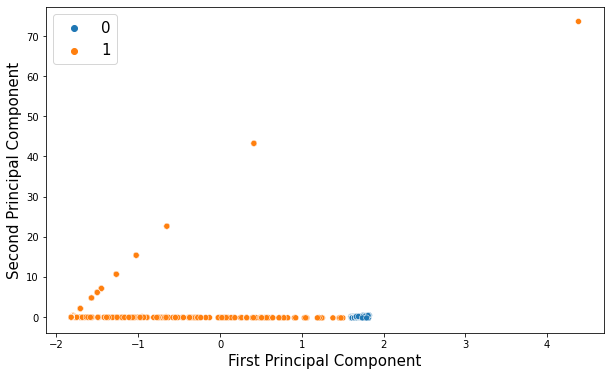

In [39]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=df['Status'])
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.legend(fontsize=15)

From this plot, we can see voice and ping are easy to identify using first 2 principle components. Ping and DNS are difficult. That is why we use all the features in our data not just first two components. 

#### Decision Boundary w/ PCA
The decision boundary is where the model switches from predicting one class to another. For visual representation purposes, we will again use the principal components we computed above for training. This way we can train a model with 2 features, and visualize the decision boundary in 2D space. However, the real model will use all the features and so the decision boundary may be different. 

We will follow the same steps as above for training a model. We use the coded y as the contour plot that we use below prefers numerical values.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y.cat.codes,test_size=0.3, random_state=101)

In [41]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

As discussed above, the accuracy value is lower when we only use the first 2 principle components as opposed to the full set of features. Again, this is just for visualization purposes.

In [42]:
predictions = model.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 99.74%


#### Plotting
We will first generate a grid of x[0] and x[1] values that we will use to make predictions with.

In [43]:
x_min = x_pca[:,0].min()
x_max = x_pca[:,0].max()
y_min = x_pca[:,1].min()
y_max = x_pca[:,1].max()
spacing = 0.01

In [44]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, spacing), np.arange(y_min, y_max, spacing))

Now we will make predictions on the grid that we created. The `ravel` function just makes the 2D array that we have above into a 1D array. We will reshape the predictions Z into a 2D array afterwards for plotting

In [45]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Now we will plot the data, and the decision boundaries.

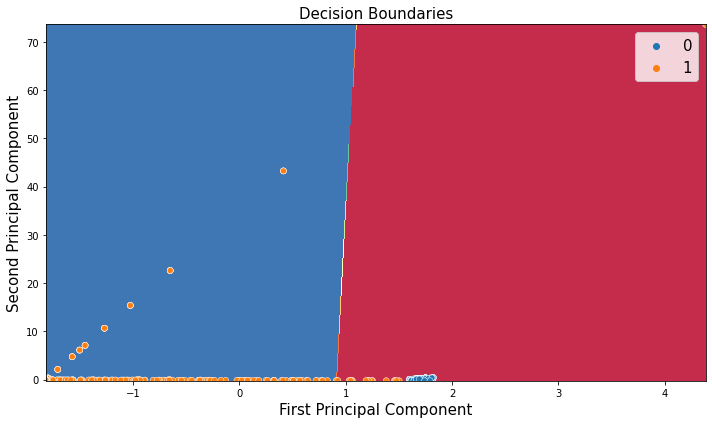

In [46]:
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=df['Status'], cmap=plt.cm.Spectral)
plt.title('Decision Boundaries', fontsize=15)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.tight_layout()
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.legend(fontsize=15)

From the above you can see the decision splits. Voice and Telnet traffic are easily classifiable. Ping and DNS are harder to distinguish with only 2 components. 

## <a name="E2"> 3. Unsupervised Model - K-Means Clustering

Now we will train a K-means clustering model on this dataset.

#### Build model
Here we will build a `sklearn KMeans` model with 4 possible clusters for each type of traffic:

In [47]:
X = df.drop('Status',axis=1)
y = df['Status']

In [48]:
model = KMeans(n_clusters=len(y.cat.categories))

#### Train & predict

In [49]:
clusters = model.fit_predict(X)

#### Evaluate generated clusters

#### Shape of clusters

In [ ]:
model.cluster_centers_.shape

We see that there are 4 clusters in 12 dimensions. 

#### Visualize clusters
Let's visualize each of these cluster centers to see what they represent. The 12 size vector is reshaped into a 4x3, and visualized using matplotlib.

In [ ]:
fig = plt.figure(figsize=(8, 3))
for i in range(len(y.cat.categories)):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[], yticks=[])
    ax.set_title(str(y.cat.categories[i]))
    ax.imshow(model.cluster_centers_[i].reshape((1, 6)), cmap=plt.cm.binary)

From the above we can see which features Kmeans looks for to differentiate the traffic types

#### Evaluate accuracy of model

In [ ]:
df['Status'].value_counts()

In [ ]:
y_codes.tolist().count(0) #DNS

In [ ]:
y_codes.tolist().count(1) #Ping

In [ ]:
y_codes.tolist().count(2) #Telnet

In [ ]:
y_codes.tolist().count(3) #Voice

In [ ]:
strlabels = ['']*len(y)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'dns'
    elif clusters[i]==1: strlabels[i] = 'ping'
    elif clusters[i]==2: strlabels[i] = 'telnet'
    elif clusters[i]==3: strlabels[i] = 'voice'

Accuracy:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, strlabels)*100.0

The accuracy is very poor at just <b>%30.54</b>. With only 4 possible cluster labels, the model is pretty much guessing the right label. We will see why using PCA analysis

#### Plot results with PCA
Let's use PCA visualization and look at the true cluster labels and the K-means cluster labels. PCA is a dimensionality reduction technique which will allow us to plot the results in 2D.

Apply PCA to reduce dimensions to 2D:

In [ ]:
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(X)

Plot clusters from PCA and true labels:

In [ ]:
y_codes =  np.asarray(y.cat.codes)

In [ ]:
labels = np.zeros_like(clusters) # Create an array of 0s with equal length ot the number of clusters

# Set labels based on the modes of the target
for i in range(len(y.cat.categories)):
    mask = (clusters == i)
    labels[mask] = stats.mode(y_codes[mask])[0]
print (labels)

In [ ]:
kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 4),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=clusters, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=y_codes, **kwargs)
ax[1].set_title('true labels');

We can see here the the KMeans model is not labelling accurately. It is splitting voice into two labels and incorrectly labelling half of telnet flows. This is because KMeans works well with circular clusters and our traffic data appears to be more linear in shape. 

#### Confusion Matrix

In [ ]:
cm=confusion_matrix(y, strlabels, labels=['ping','voice','dns','telnet'])
cm

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, rotation=45, fontsize=12)
plt.yticks(tick_marks,  fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

The confusion matrix further shows how poorly our model performs. Usually we expect high numbers along the diagonal. 

Dumping the model for real-time use later

In [ ]:
pickle.dump(model,open('KMeans_Clustering','wb'))